In [1]:
import healpy as hp
import numpy as np
from rubin_scheduler.utils import (
    angular_separation,
    ddf_locations,
    ddf_locations_pre3_5,
    hpid2_ra_dec,
    sample_patch_on_sphere,
)

from rubin_sim.data import get_baseline
import rubin_sim.maf as maf


import os

In [2]:
baseline_file = get_baseline()
run_name = os.path.basename(baseline_file).replace('.db','')
out_dir = 'temp'
results_db = maf.db.ResultsDb(out_dir=out_dir)


In [3]:
filterlist, colors, orders, sqls, info_labels = maf.filter_list(
        all=True, 
    )

In [4]:
ddfs = {}
   
ddfs_rough = ddf_locations()
for ddf in ddfs_rough:
    ddfs[ddf] = {"ra": ddfs_rough[ddf][0], "dec": ddfs_rough[ddf][1]}
# Combine the Euclid double-field into one - but with two ra/dec values
ddfs["EDFS"] = {
    "ra": [ddfs["EDFS_a"]["ra"], ddfs["EDFS_b"]["ra"]],
    "dec": [ddfs["EDFS_a"]["dec"], ddfs["EDFS_b"]["dec"]],
}
del ddfs["EDFS_a"]
del ddfs["EDFS_b"]
# Let's include an arbitrary point that should be in the WFD for comparison
ddfs["WFD"] = {"ra": 0, "dec": -20.0}

nside = 512

ra, dec = hpid2_ra_dec(nside, np.arange(hp.nside2npix(nside)))
radius=2.1
ddf_slicers = {}
for ddf in ddfs:
    # Define the healpixels to use for this DDF
    if np.size(ddfs[ddf]["ra"]) > 1:
        goods = []
        goods_sne = []
        for ddf_ra, ddf_dec in zip(ddfs[ddf]["ra"], ddfs[ddf]["dec"]):
            dist = angular_separation(ra, dec, ddf_ra, ddf_dec)
            goods.append(np.where(dist <= radius)[0])
        good = np.unique(np.concatenate(goods))
    else:
        dist = angular_separation(ra, dec, np.mean(ddfs[ddf]["ra"]), np.mean(ddfs[ddf]["dec"]))
        good = np.where(dist <= radius)[0]
    ddf_slicers[ddf] = maf.HealpixSubsetSlicer(nside, good, use_cache=False)

Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes


In [12]:
depth_stats = [maf.MedianMetric()]
bundle_list = []

plot_funcs = [maf.HealpixSkyMap()]



for ddf in ddfs:
    fieldname = ddf
    plot_dict = {
            "visufunc": hp.gnomview,
            "rot": (np.mean(ddfs[ddf]["ra"]), np.mean(ddfs[ddf]["dec"]), 0),
            "xsize": 500,
        }
    if not (fieldname.startswith("DD")):
        fieldname = f"DD:{fieldname}"
    for f in "ugrizy":
        metric = maf.CountMetric(col="observationStartMJD", units="#", metric_name=f"{fieldname} NVisits")
        bundle_list.append(
            maf.MetricBundle(
                metric,
                ddf_slicers[ddf],
                sqls[f],
                info_label=info_labels[f],
                run_name=run_name,
                summary_metrics=depth_stats,
                plot_funcs=plot_funcs,
                plot_dict=plot_dict,
            )
        )
    # Count over all filter
    metric = maf.CountMetric(col="observationStartMJD", units="#", metric_name=f"{fieldname} NVisits")
    bundle_list.append(
        maf.MetricBundle(
            metric,
            ddf_slicers[ddf],
            constraint=sqls["all"],
            info_label=info_labels["all"],
            run_name=run_name,
            summary_metrics=depth_stats,
            plot_funcs=plot_funcs,
            plot_dict=plot_dict,
        )
    )

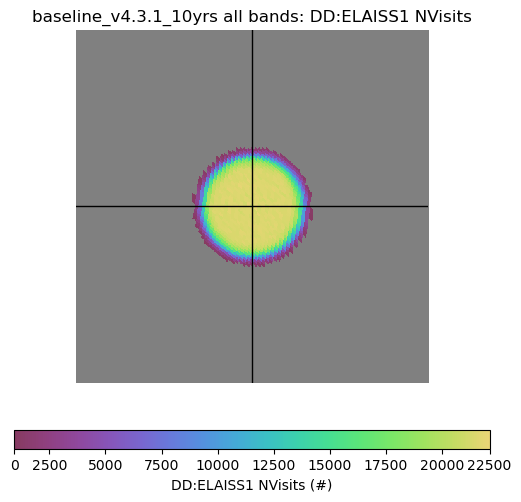

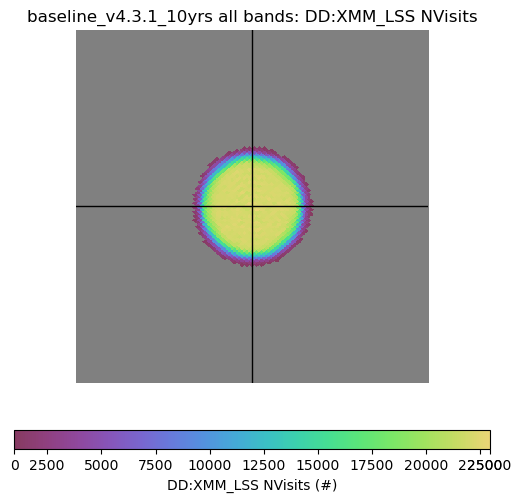

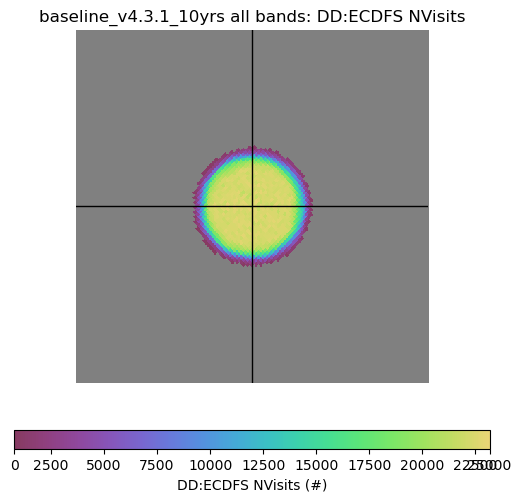

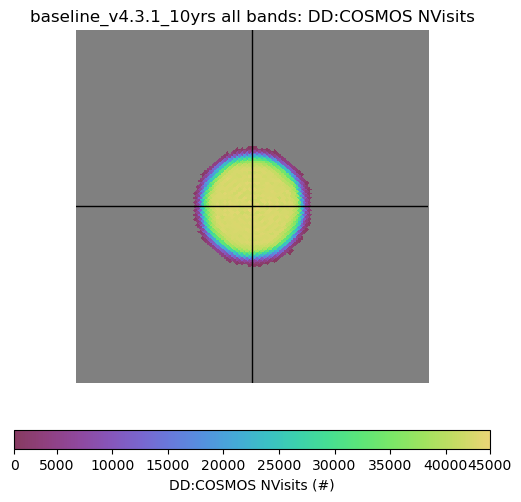

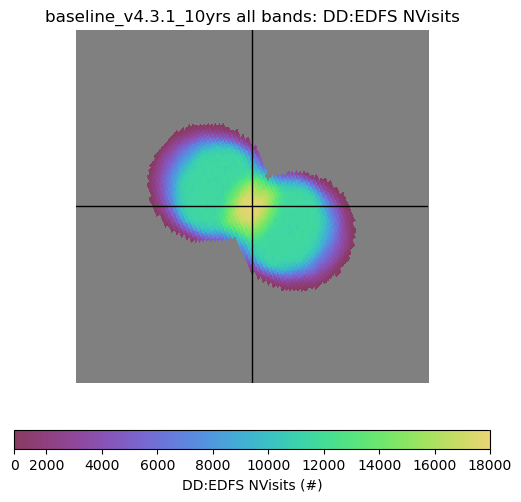

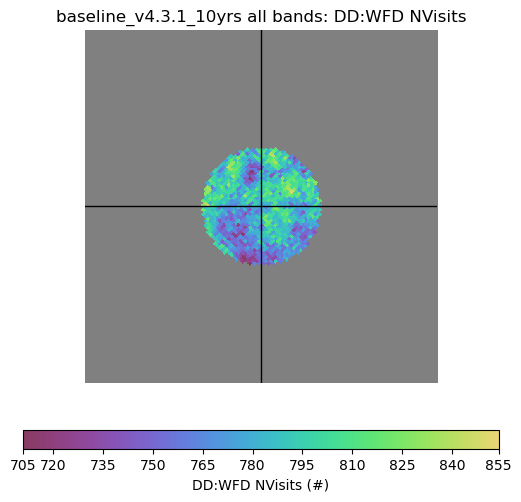

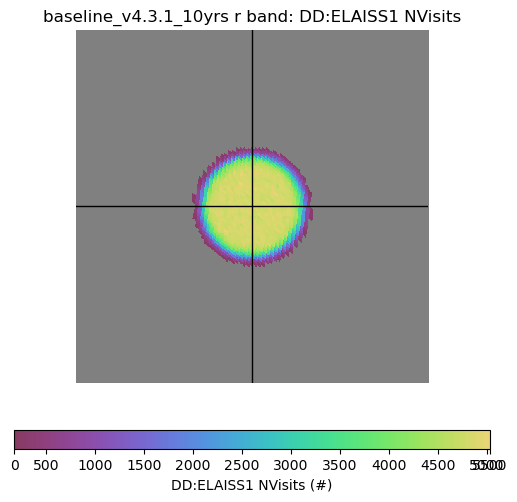

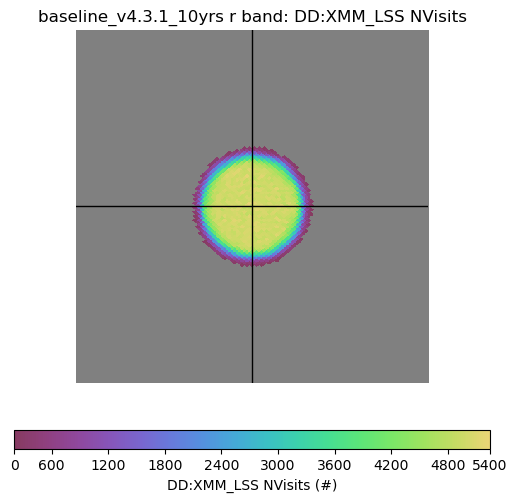

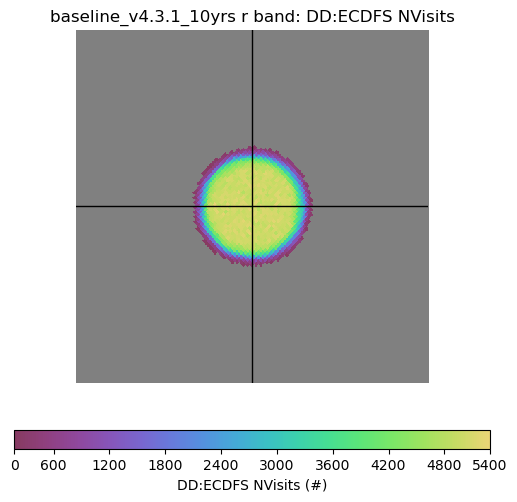

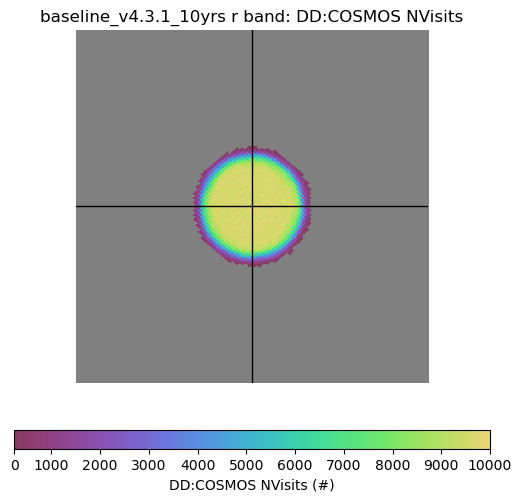

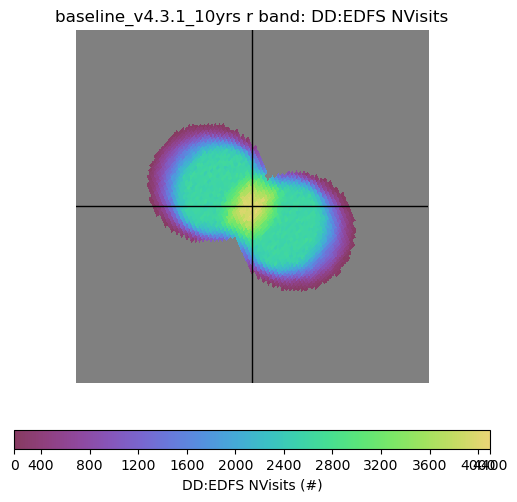

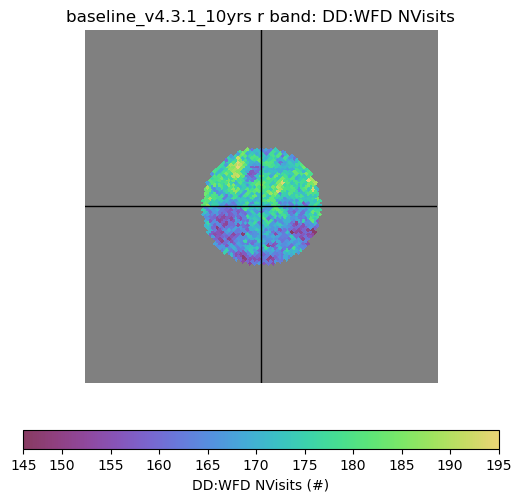

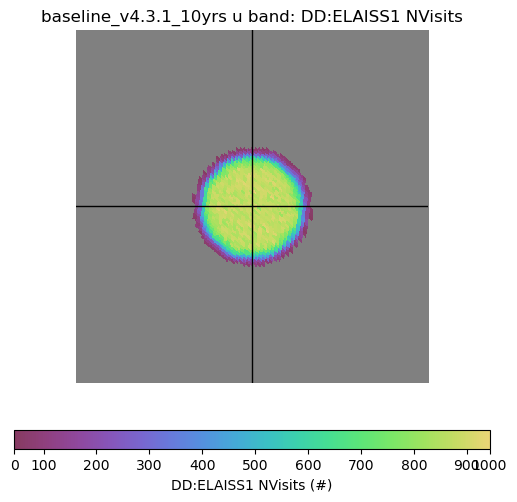

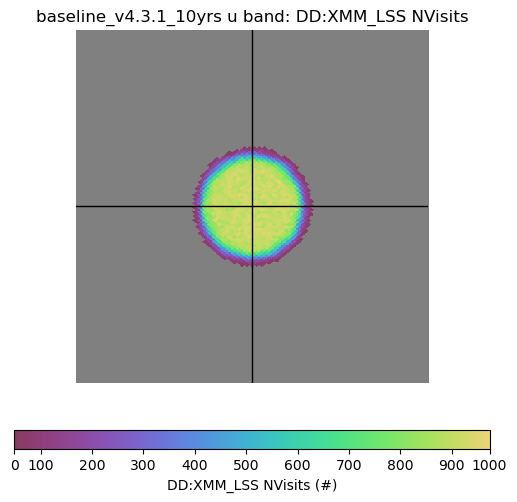

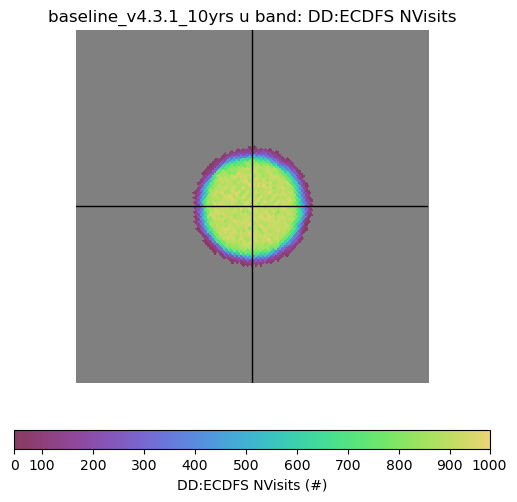

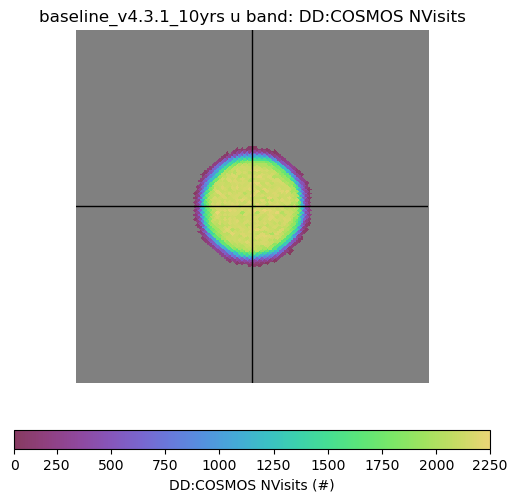

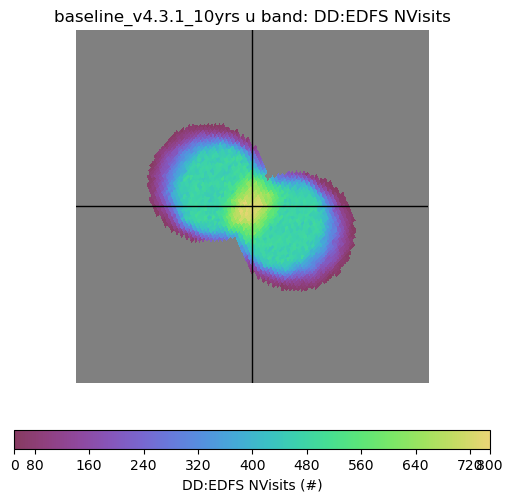

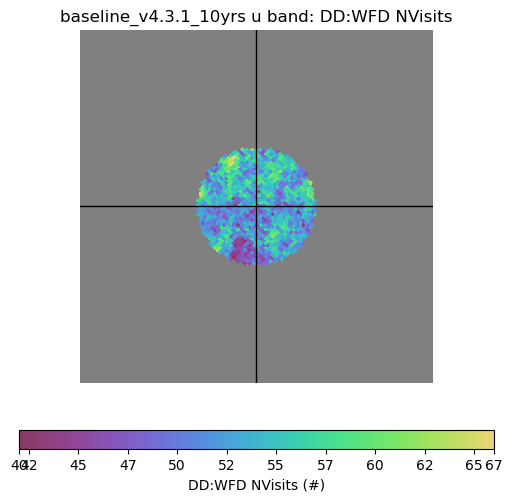

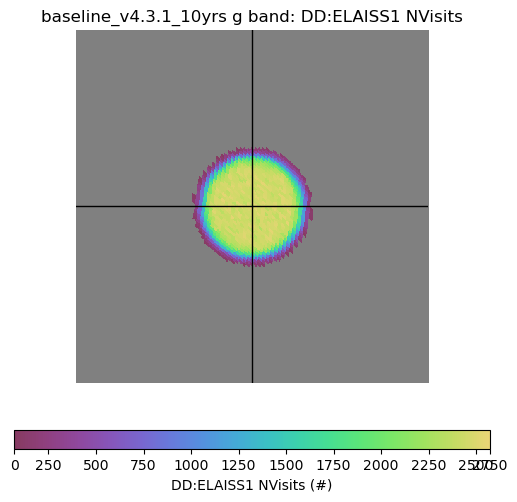

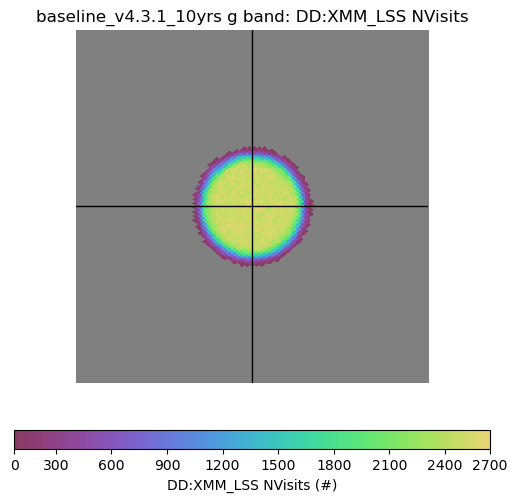

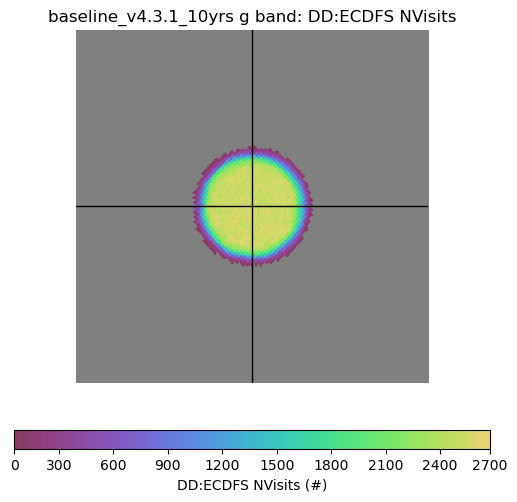

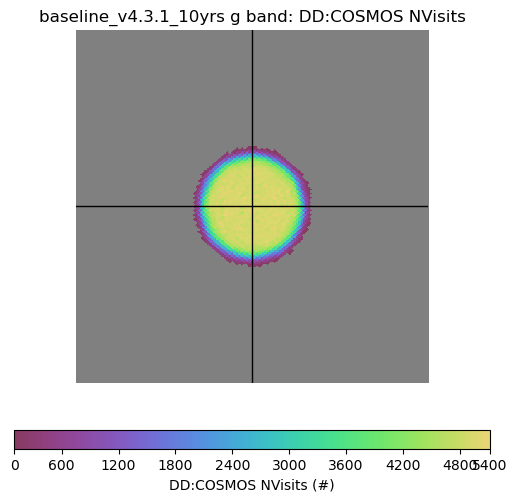

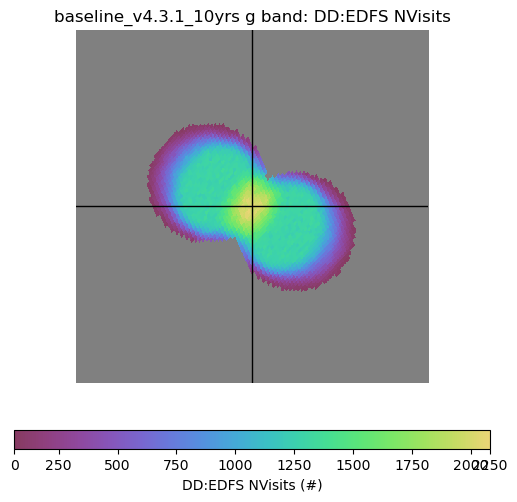

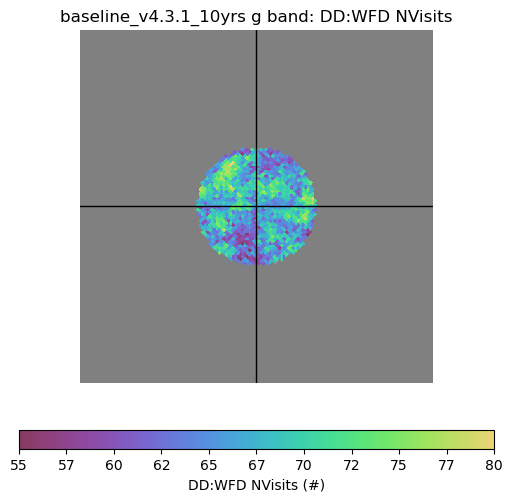

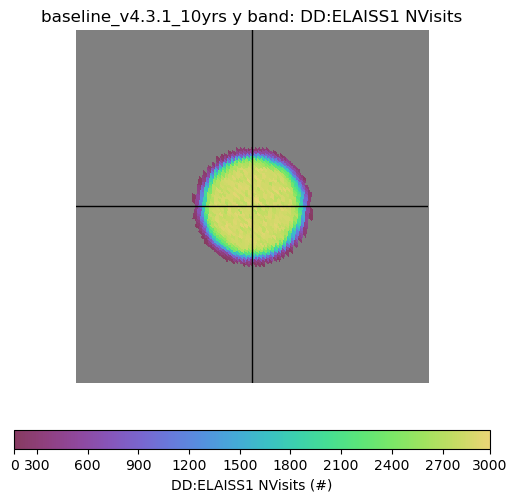

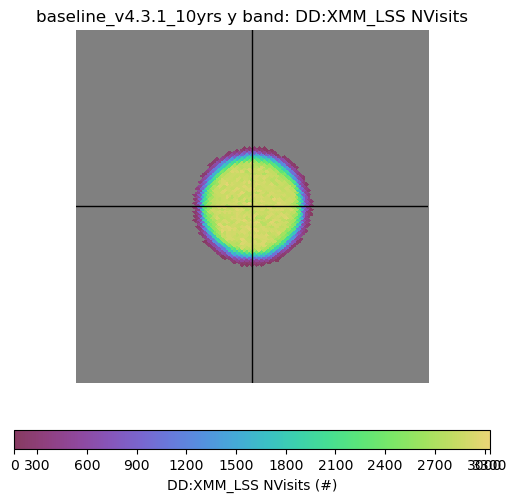

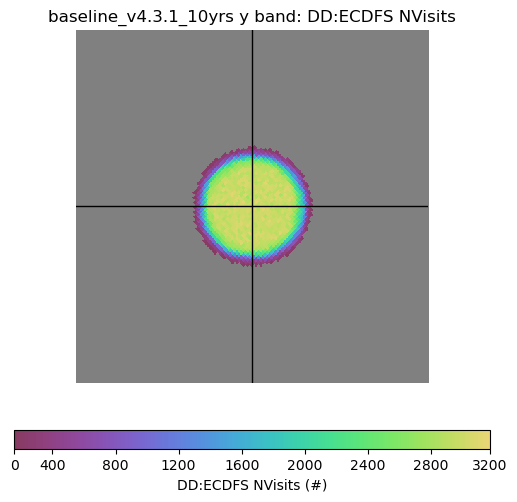

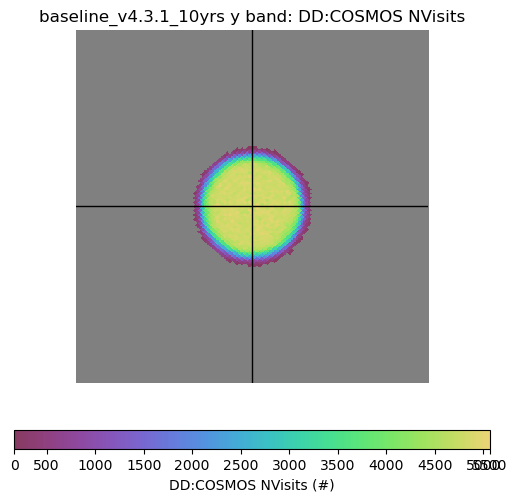

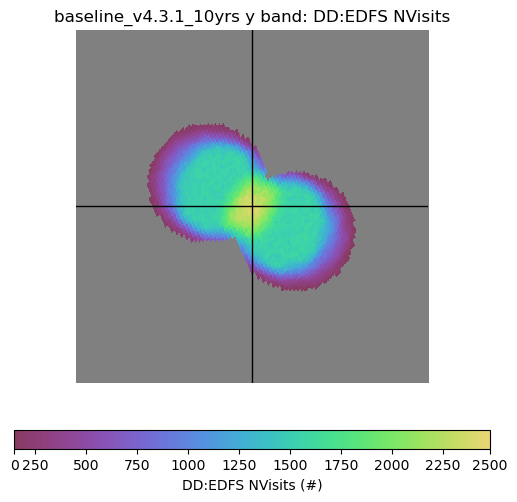

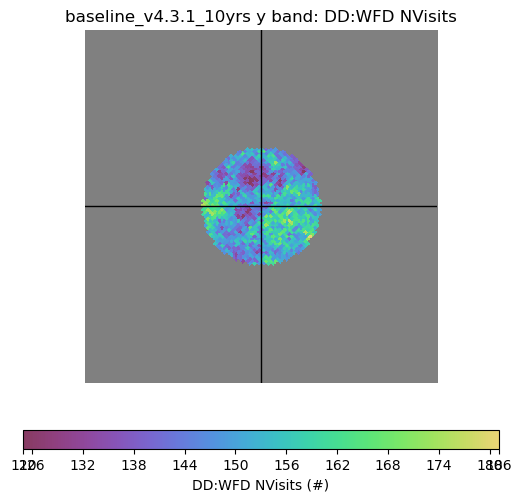

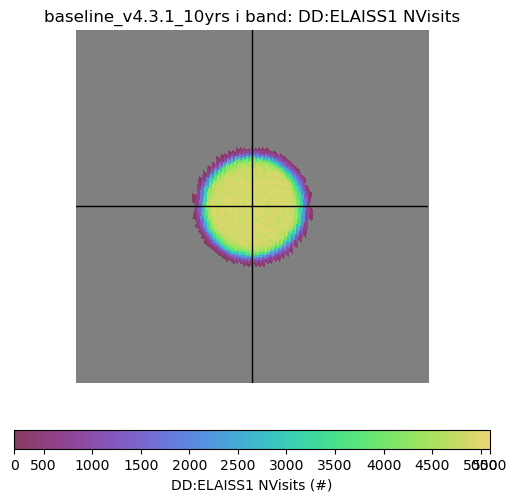

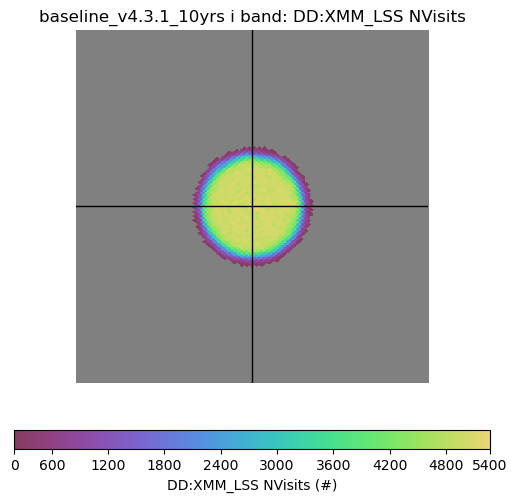

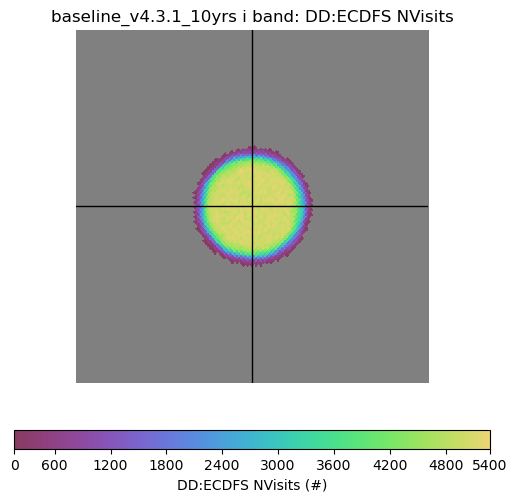

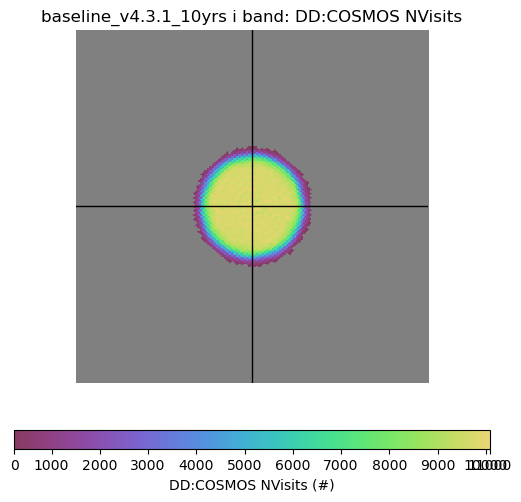

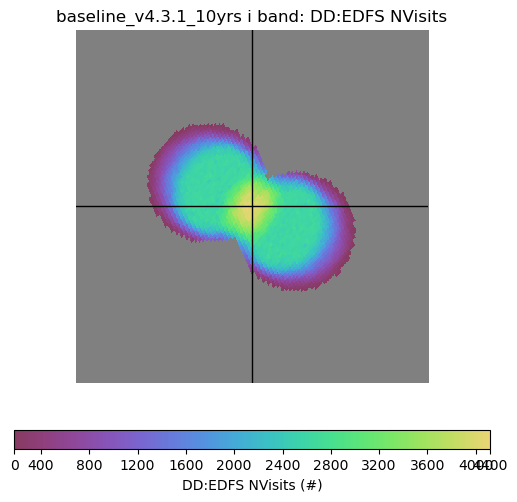

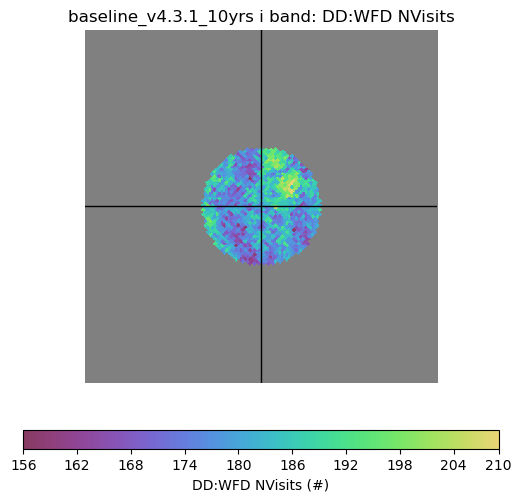

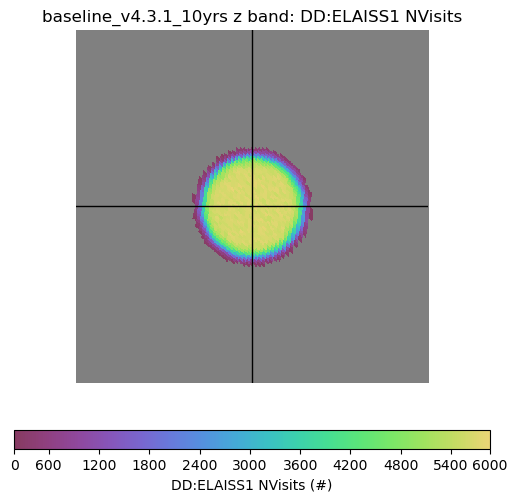

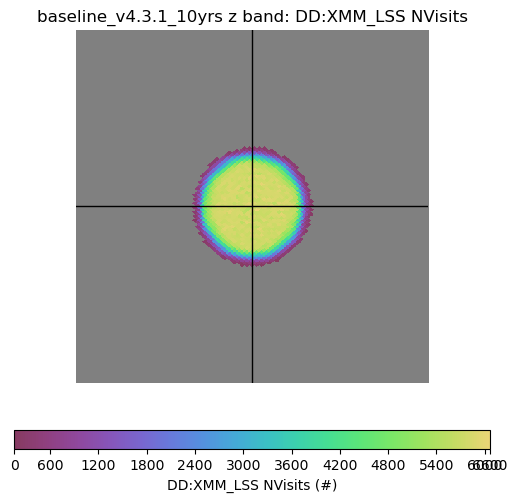

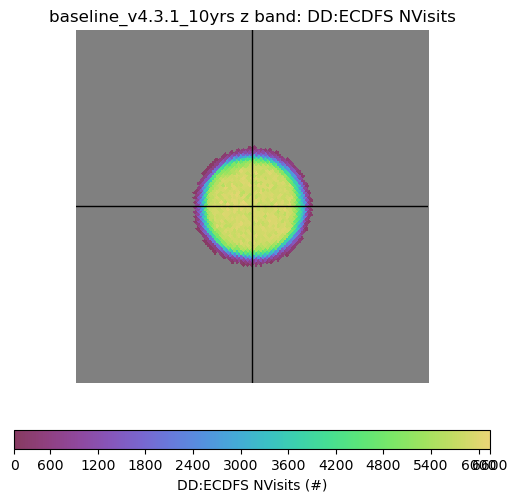

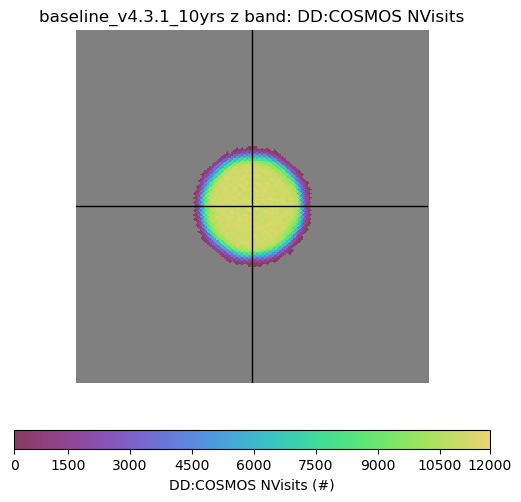

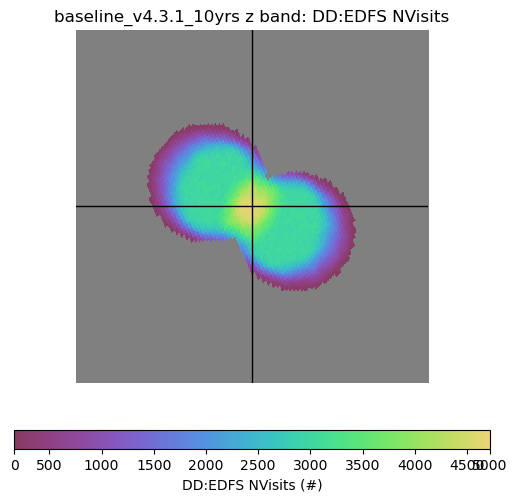

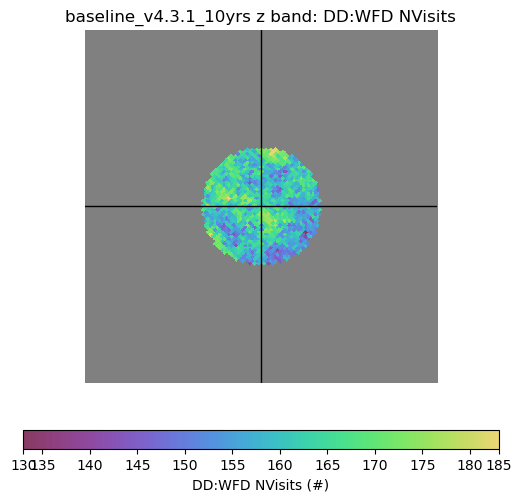

In [13]:
bd = maf.metricBundles.make_bundles_dict_from_list(bundle_list)
bg = maf.metricBundles.MetricBundleGroup(bd, baseline_file, out_dir=out_dir, results_db=results_db)
bg.run_all()
bg.plot_all(closefigs=False)

In [8]:
for b in bundle_list:
    print(b.summary_values)

{'Median': np.float64(830.0)}
{'Median': np.float64(2349.0)}
{'Median': np.float64(4641.0)}
{'Median': np.float64(4675.0)}
{'Median': np.float64(5424.0)}
{'Median': np.float64(2719.0)}
{'Median': np.float64(20681.0)}
{'Median': np.float64(871.0)}
{'Median': np.float64(2387.0)}
{'Median': np.float64(4808.0)}
{'Median': np.float64(4777.0)}
{'Median': np.float64(5550.0)}
{'Median': np.float64(2752.0)}
{'Median': np.float64(21199.0)}
{'Median': np.float64(859.0)}
{'Median': np.float64(2416.0)}
{'Median': np.float64(4810.0)}
{'Median': np.float64(4847.5)}
{'Median': np.float64(5605.0)}
{'Median': np.float64(2840.0)}
{'Median': np.float64(21451.0)}
{'Median': np.float64(2041.0)}
{'Median': np.float64(4708.5)}
{'Median': np.float64(9254.5)}
{'Median': np.float64(9360.5)}
{'Median': np.float64(10731.5)}
{'Median': np.float64(4631.0)}
{'Median': np.float64(40755.5)}
{'Median': np.float64(426.0)}
{'Median': np.float64(1153.0)}
{'Median': np.float64(2307.0)}
{'Median': np.float64(2344.0)}
{'Media

In [9]:
for b in bundle_list:
    print(b.summary_values)

{'Median': np.float64(830.0)}
{'Median': np.float64(2349.0)}
{'Median': np.float64(4641.0)}
{'Median': np.float64(4675.0)}
{'Median': np.float64(5424.0)}
{'Median': np.float64(2719.0)}
{'Median': np.float64(20681.0)}
{'Median': np.float64(871.0)}
{'Median': np.float64(2387.0)}
{'Median': np.float64(4808.0)}
{'Median': np.float64(4777.0)}
{'Median': np.float64(5550.0)}
{'Median': np.float64(2752.0)}
{'Median': np.float64(21199.0)}
{'Median': np.float64(859.0)}
{'Median': np.float64(2416.0)}
{'Median': np.float64(4810.0)}
{'Median': np.float64(4847.5)}
{'Median': np.float64(5605.0)}
{'Median': np.float64(2840.0)}
{'Median': np.float64(21451.0)}
{'Median': np.float64(2041.0)}
{'Median': np.float64(4708.5)}
{'Median': np.float64(9254.5)}
{'Median': np.float64(9360.5)}
{'Median': np.float64(10731.5)}
{'Median': np.float64(4631.0)}
{'Median': np.float64(40755.5)}
{'Median': np.float64(426.0)}
{'Median': np.float64(1153.0)}
{'Median': np.float64(2307.0)}
{'Median': np.float64(2344.0)}
{'Media